# Assignment 5- Network Science
## Scale Free Networks

In [1]:
import networkx as nx                           #for network analysis
import numpy as np                              #for mathematical analysis
import matplotlib.pyplot as plt                 #for visualization
import powerlaw                                 #for obtaining powerlaw distribution curves
import scipy.special                            #for poisson and exponential distributions

In [2]:
#importing the datasets
#actors=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (3)\\data\\graph_actors.gml")   ----too big to load into my system
amazon=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (3)\\data\\graph_amazon.gml")
escort=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (3)\\data\\graph_escort.gml")
internet=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (3)\\data\\graph_internet.gml")

##### A05.1 Everyday networks are not Poisson: parameter estimation and model selection

In this segment, I am going to write a function to describes the power law distribution and then outputs its alpha and sigma values. Correspondingly, it also outputs a graph that shows various poisson and exponential distributions alongside the power law distribution for a certain average degree of the network.

In [3]:
def plot_dist_estimates(name_of_network,filename):
    degree_dist = np.asarray([d for d in dict(name_of_network.degree()).values()])              #defining and obtaining values of the degree distribution
    average_degree = np.mean(degree_dist)                                                       #defining and obtaining the values of the average degree
    degree_spaced = np.linspace(min(degree_dist),max(degree_dist),len(degree_dist))             #getting a properly spaced out degree list
    
    fit=powerlaw.Fit(degree_dist)                                                               #getting a powerlaw fit 
    alpha = fit.power_law.alpha                                                                 #getting the alpha values using the power fit
    sigma = fit.power_law.sigma                                                                 #getting the error values using the powerfit
    
    print('\n\n')    
    print('Power-law exponent for '+ filename + 'network: alpha = ', round(alpha,3))            #printing the alpha value for the network
    print('Corresponding error '+ filename + 'network: sigma = ', round(sigma,3))               #printing the error values for the network
    print('\n\n')
    
    poisson_list=[]                                                                             #defining a poisson list
    exp_list=[]                                                                                 #defining an exponential list
    k_list=[]                                                                                   #defining the degree list
    
    for k in degree_spaced:
        poisson = ((average_degree**k)/scipy.special.factorial(k))*scipy.math.exp(-average_degree) # Poisson Distribution
        poisson_list.append(poisson)                                                               #appending the poisson distribution list
        
        exp = (average_degree**(-1))*scipy.math.exp(-k/average_degree)                             # Exponential Distribution
        exp_list.append(exp)                                                                       #appending the exponential distribution list
        
        k_list.append(k)                                                                           #appending the degree list
        
    plt.figure(figsize=(7,7))                                                                      #defining a plot
    
    fit.power_law.plot_pdf(color='r',label="Fitted")                                               #plotting the fitted power law values for the network
    powerlaw.plot_pdf(degree_dist,color='b',marker='o',label="Unfitted")                           #plotting the unfitted power law values for the network
    plt.plot(k_list,poisson_list,color="y",label="Poisson")                                        #plotting the poisson distribution curve for the network
    plt.plot(k_list,exp_list,color="g",label="Exponential")                                        #plotting the exponential distribution curve for the network
    plt.plot(degree_spaced, degree_spaced**(-alpha), color = 'violet',label="k**(-alpha)")         #plotting the k**(-alpha) distribution curve
    plt.xscale('log')                                                                              #setting the x scale
    plt.yscale('log')                                                                              #setting the y scale
    plt.xlabel("Degree (k)")                                                                       #labelling the x axis
    plt.ylabel("Probability of degree (k)")                                                        #labelling the y axis
    plt.title("Plots for "+filename)                                                               #setting the title
    plt.ylim(10**(-8),10)                                                                          #setting the ylimit to the graph
    plt.legend()                                                                                   #defining the legends
    
    plt.show()                                                                                     #displaying the plot

Using the above function on the various given datasets.

Calculating best minimal value for power law fit
xmin progress: 99%


Power-law exponent for Amazonnetwork: alpha =  4.066
Corresponding error Amazonnetwork: sigma =  0.097





<ipython-input-3-f2d35ac5199f>:20: RuntimeWarning: overflow encountered in double_scalars
  poisson = ((average_degree**k)/scipy.special.factorial(k))*scipy.math.exp(-average_degree) # Poisson Distribution
<ipython-input-3-f2d35ac5199f>:20: RuntimeWarning: invalid value encountered in double_scalars
  poisson = ((average_degree**k)/scipy.special.factorial(k))*scipy.math.exp(-average_degree) # Poisson Distribution


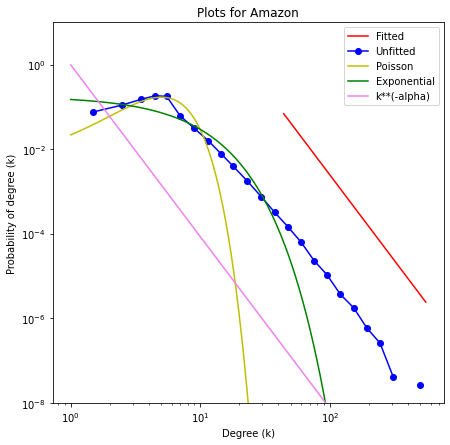

Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 02%
xmin progress: 03%
xmin progress: 04%
xmin progress: 05%
xmin progress: 05%
xmin progress: 06%
xmin progress: 07%
xmin progress: 08%
xmin progress: 09%
xmin progress: 10%
xmin progress: 11%
xmin progress: 11%
xmin progress: 12%
xmin progress: 13%
xmin progress: 14%
xmin progress: 15%
xmin progress: 16%
xmin progress: 17%
xmin progress: 17%
xmin progress: 18%
xmin progress: 19%
xmin progress: 20%
xmin progress: 21%
xmin progress: 22%
xmin progress: 23%
xmin progress: 23%
xmin progress: 24%
xmin progress: 25%
xmin progress: 26%
xmin progress: 27%
xmin progress: 28%
xmin progress: 29%
xmin progress: 29%
xmin progress: 30%
xmin progress: 31%
xmin progress: 32%
xmin progress: 33%
xmin progress: 34%
xmin progress: 35%
xmin progress: 35%
xmin progress: 36%
xmin progress: 37%
xmin progress: 38%
xmin progress: 39%
xmin progress: 40%
xmin progress: 41%
xmin progress: 41%
x

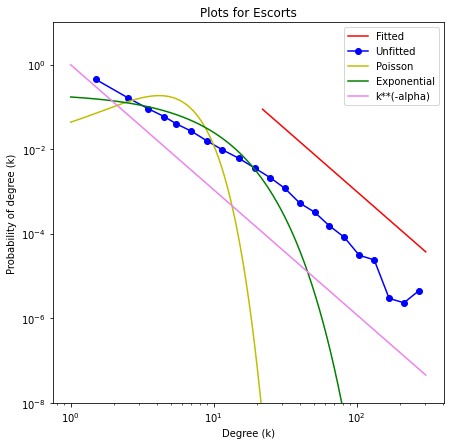

Calculating best minimal value for power law fit
xmin progress: 99%


Power-law exponent for Internetnetwork: alpha =  2.112
Corresponding error Internetnetwork: sigma =  0.037





<ipython-input-3-f2d35ac5199f>:20: RuntimeWarning: overflow encountered in double_scalars
  poisson = ((average_degree**k)/scipy.special.factorial(k))*scipy.math.exp(-average_degree) # Poisson Distribution
<ipython-input-3-f2d35ac5199f>:20: RuntimeWarning: invalid value encountered in double_scalars
  poisson = ((average_degree**k)/scipy.special.factorial(k))*scipy.math.exp(-average_degree) # Poisson Distribution


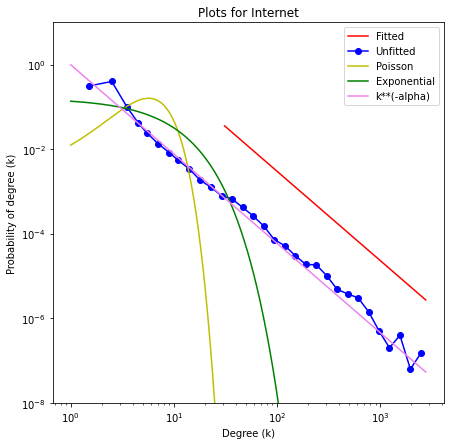

In [4]:
plot_dist_estimates(amazon,"Amazon")
plot_dist_estimates(escort,"Escorts")
plot_dist_estimates(internet,"Internet")
#plot_dist_estimates(actors,"Actors")  ------too big to run on my system.

#### Observations:
1. The Poisson distribution and the Exponential Distribution do not have a broad curve. That is their standard deviation are low. They steep very low at degree values lower than expected and do not account for the high degree values. They cannot be assumed to show the distribution that describes the data.
2. The k**(-alpha) curve seems to be the best fit amongst the Poisson, Exponential and itself to describe the data distribution because atleast it accounts for all the values of degrees.
3. For the Internet Network, certain nodes can have very high connectivity while the others can have low connectivity. They do not always tend to fall around the average degree in an internet network, thus it is not described well by Poisson and Exponential Distribution. However, the Power Law distribution seems to perfectly descrbe the internet network as it almost overlaps with the fitted values. 

One reason in practice that Poisson also does not show its distribution centered around high degree nodes is because their numbers are considerably less. However, due to high degree, these are very important nodes of the network and needs to be accounted for. 

#### A05.2 Barabási-Albert model

Build networks with the Barabási-Albert model. Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000, then compute some network properties. Compare them with randomised versions of the networks.

Finding the average clustering coefficient, assortativity, average shortest path length and diameter of this model. Also compare them with their randomized versions.

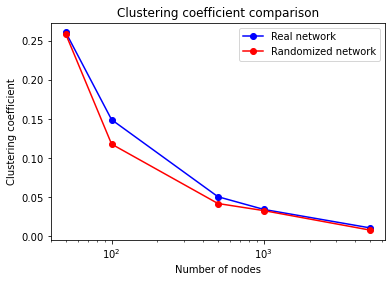

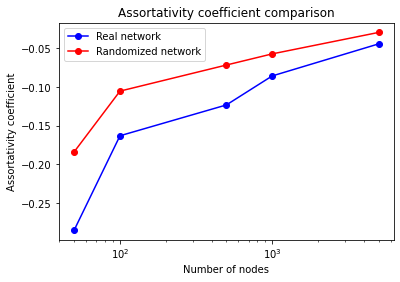

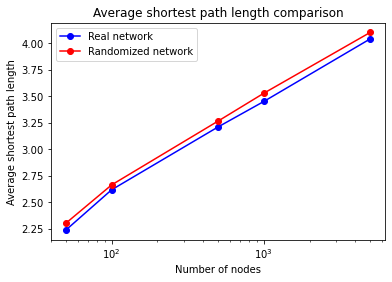

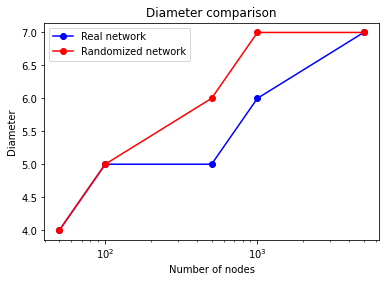

In [6]:
N = [50,100,500,1000,5000]                              #defining a list of N values

clust_coeff_real = []                                   #list for storing the clustering coefficient of real networks
assort_real = []                                        #list for storing the assortativity of real networks
path_real = []                                          #list for storing the average path length for real networks
diameter_real = []                                      #list for storing the diameter of the real model

clust_coeff_random = []                                 #list for storing the clustering coefficient of random networks
assort_random = []                                      #list for storing the assortativity of random networks
path_random = []                                        #list for storing the average shortest path length for random networks
diameter_random = []                                   #list for storing the diameter of random networks


for c in N:                                             #iterating over the N values
    
    network = nx.barabasi_albert_graph(c,3)              # generate barabasi albert graph 
    
    clust_coeff = nx.average_clustering(network)           # average clustering coefficient
    assort = nx.degree_assortativity_coefficient(network)  # assortativity coefficient
    path = nx.average_shortest_path_length(network)        # average shortest path length
    diameter = nx.diameter(network)                        # diameter of the graph
    
    clust_coeff_real.append(clust_coeff)                 #appending the lists
    assort_real.append(assort)
    path_real.append(path)
    diameter_real.append(diameter)

    
    
    # randomizing the network
    random_network = nx.algorithms.smallworld.random_reference(network, niter = 10, connectivity=False)
    
    clust_coeff_rand = nx.average_clustering(random_network)           # average clustering coefficient
    assort_rand = nx.degree_assortativity_coefficient(random_network)  # assortativity coefficient
    path_rand = nx.average_shortest_path_length(random_network)        # average shortest path length
    diameter_rand = nx.diameter(random_network)                        # diameter of the graph
    
    clust_coeff_random.append(clust_coeff_rand)                        #appending the randomized lists
    assort_random.append(assort_rand)
    path_random.append(path_rand)
    diameter_random.append(diameter_rand)
    
    
    
real_list = [clust_coeff_real, assort_real, path_real, diameter_real]                          #list for coefficients of real network
random_list = [clust_coeff_random, assort_random, path_random, diameter_random]                #list for coefficients of random networks

label_list = ['Clustering coefficient', 'Assortativity coefficient', 'Average shortest path length', 'Diameter']  #list for titles

for i in range(0, len(real_list)):
    
    # plot graphs
    plt.plot(N,real_list[i], '-ok', label = 'Real network', color = 'blue')                     #defining the plots
    plt.plot(N,random_list[i], '-ok', label = 'Randomized network', color = 'red')
    plt.title(label_list[i] + ' comparison')                                                    #adding a title to the graph
    plt.xlabel('Number of nodes')                                                               #labelling the x axis
    plt.ylabel(label_list[i])                                                                   #labelling they axis
    plt.xscale('log')                                                                           #setting the x scale
    plt.legend()                                                                                #obtaining the legends
    plt.show()                                                                                  #displaying the graph

#### Observations:
1. In the above graphs, the clustering coefficients seems relatively unchanged at higher node values, while Assortativity and Diameter of the network changes upon randomizaton. 
2. The average shortest path length however, does not change upon randomization. This is because upon randomization, while the number of nodes and edges for a node remains the same, the average shortest path increases for certain nodes and decreases for the other- keeping the average constant. The basic topology upon randomization remains the same in the Barabasi model.